In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
print(target)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


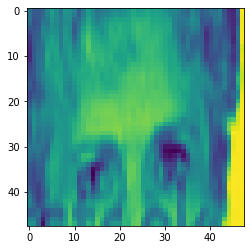

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(data[8])

In [4]:
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
import keras

model_1 = models.Sequential()

# Conv (evrişim katmanı)
model_1.add(layers.Conv2D(64, (5, 5), activation='relu'))
#Ortaklama katmanı
model_1.add(layers.MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model_1.add(layers.Flatten())

# Tam bağlantı katmanı
model_1.add(layers.Dense(1024, activation='relu'))
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(1024, activation='relu'))
model_1.add(layers.Dropout(0.2))

model_1.add(layers.Dense(7, activation='softmax'))
fit = True #Train etmek için fit=True olarak değiştir






model_1.compile(loss='categorical_crossentropy'

    , optimizer=keras.optimizers.Adam()

    , metrics=['accuracy']

)




if fit == True:

  model_1.fit(data,target,batch_size=128,epochs = 32)

  #model.fit_generator(x_train, y_train, steps_per_epoch=batch_size,epochs=epochs) #Tüm veri kümesi için eğit

  #model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #rastgele bir eğtiim yap

else:

  model_1.load_weights(root + 'fer2013/facial_expression_model_weights.h5') #Öğrenilmiş ağırlıkları yükle

Epoch 1/32
225/225 [==============================] - 75s 333ms/step - loss: 1.8145 - accuracy: 0.2508
Epoch 2/32
225/225 [==============================] - 79s 349ms/step - loss: 1.7890 - accuracy: 0.2561
Epoch 3/32
225/225 [==============================] - 74s 330ms/step - loss: 1.7709 - accuracy: 0.2649
Epoch 4/32
225/225 [==============================] - 73s 325ms/step - loss: 1.7485 - accuracy: 0.2740
Epoch 5/32
225/225 [==============================] - 83s 367ms/step - loss: 1.7292 - accuracy: 0.2890
Epoch 6/32
225/225 [==============================] - 79s 353ms/step - loss: 1.7081 - accuracy: 0.3035
Epoch 7/32
225/225 [==============================] - 74s 329ms/step - loss: 1.6763 - accuracy: 0.3202
Epoch 8/32
225/225 [==============================] - 73s 324ms/step - loss: 1.6570 - accuracy: 0.3293
Epoch 9/32
225/225 [==============================] - 76s 338ms/step - loss: 1.6291 - accuracy: 0.3459
Epoch 10/32
225/225 [==============================] - 78s 346ms/step - l

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))